---

title: 如何理解置信区间
date: 2024-10-08
author: 郝鸿涛
slug: ci
draft: false
toc: true
tags: 统计学

---

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import t

英文维基百科上的置信区间 (confidence interval) [词条](https://en.wikipedia.org/wiki/Confidence_interval#Example)对此概念解释非常详细。

我们依然拿天狼星人举例子。SpaceX 公司登陆火星之后发现火星地下上全是天狼星人。他们搜集了全部的在火星上居住天狼星人的信息之后，对其进行抽样。随机抽取了 100 个天狼星人，然后测量他们的智商 ($X_1, X_2, X_3, ... X_n$)。记样本均值为 $\bar{X}$、样本方差为 $S^2$。

我们现在最迫切需要知道的是：天狼星人的智商大体是什么样。

注意，我们现在不是要去比较天狼星人和地球人智商有没有显著差异，而是想知道天狼星人的智商大概是什么样。你当然可以直接抛给我一个数：$\bar{X}$，说这是这 100 个天狼星人的平均智商。但是，问题是，我想知道母体的数据啊。

怎么办？

我们把所有天狼星人智商这一母体的均值记为 $\mu$，方差记为 $\sigma^2$。

假设上面的抽样进行无数次，也就是每次随机抽取 100 个天狼星人，记录其样本均值和方差，并且每次算出

$$T = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}}$$

其中 $n = 100$。

你会说，等等，$\mu$ 我们并不知道啊，$T$ 根本没法算。

确实，一个具体的 $T$ 在我们不知道母体均值 $\mu$ 的情况下确实没办法计算。但是，回顾一下我们对于 [t 分布的讲解](/cn/2024/09/29/t/)，你会发现，不管母体如何，每次从母体中随机抽取 100 人，计算 $T$ ，重复无数次，这些 $T$ 的分布全部都是 $T \sim t_{99}$：

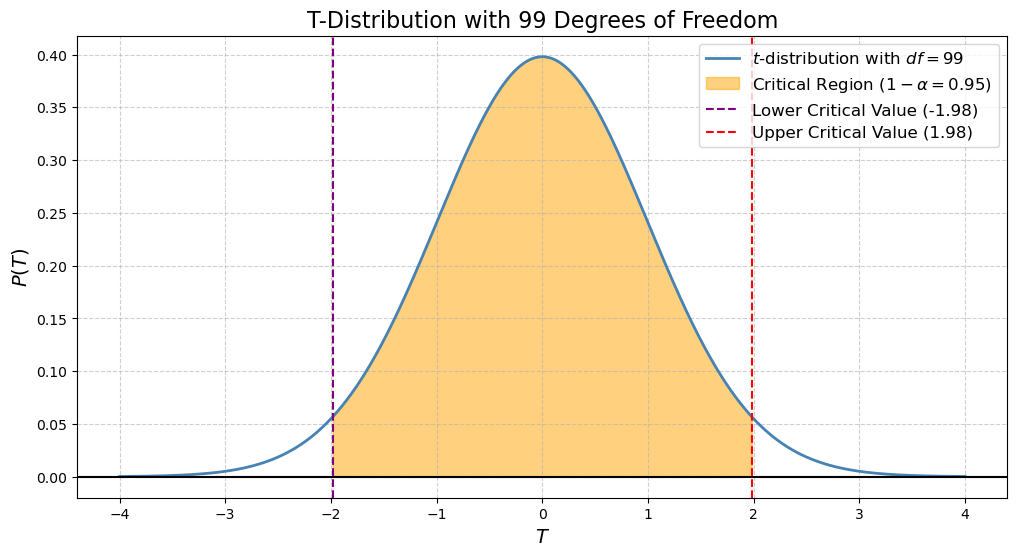

In [16]:
## params
df = 99
alpha = 0.05
x = np.linspace(-4, 4, 1000)

# calculate PDF for t-distribution
y = t.pdf(x, df=df)

# critical values for the given alpha level
q_value_upper = t.ppf(1 - alpha/2, df) 
q_value_lower = t.ppf(alpha/2, df)

# Plot the t-distribution PDF
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='steelblue', lw=2, 
    label=rf'$t$-distribution with $df={df}$')  

# Fill the area between the critical values for the two-tailed region
plt.fill_between(x, y, 
                 where=np.logical_and(x <= q_value_upper, x >= q_value_lower), 
                 color='orange', 
                 alpha = 0.5, 
                 label=rf'Critical Region ($1 - \alpha = {1 - alpha:.2f}$)')
plt.axvline(q_value_lower, color="purple", 
            linestyle='--', 
            label=f'Lower Critical Value ({q_value_lower:.2f})')
plt.axvline(q_value_upper, color="red", 
            linestyle='--', 
            label=f'Upper Critical Value ({q_value_upper:.2f})')
plt.axhline(0, color = "black")
plt.xlabel(r'$T$', fontsize = 14)
plt.ylabel(r'$P(T)$', fontsize = 14)
plt.title(rf'T-Distribution with {df} Degrees of Freedom', fontsize = 16)
plt.grid(True, linestyle='--', alpha = 0.6)
plt.legend(fontsize = 12)
plt.show()

## 置信区间的构成

我们把 $t_{99}$ 的 $97.5\%$ 百分位数 (percentile) 记为 $c$，也就是上图中红线所对应的 $T = 1.98$。其所代表的含义是所有的 $T$ 中，落在红线以及红线往左区域的 $T$ 占比为是 $97.5\%$。也可以理解为，随机一个 $T$ 落在红线以及红线往左区域的概率是 $97.5\%$

因为 $t$ 分布是对称的，所以一个随机的 $T$ 落在 $[-c, c]$ 这个区间 (也就是上图的黄色区域所对应的 $T$ 值区间) 的概率是 $95\%$，我们可以表示为：

$$P_T (-c \le T \le c) = 0.95$$

代入上面的 $T$ 计算公式可得到：

$$P (-c \le \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}} \le c) = 0.95$$

所以

$$P (-c \cdot \frac{S}{\sqrt{n}} \le \bar{X} - \mu  \le c \cdot \frac{S}{\sqrt{n}}) = 0.95$$

所以

$$P (-c \cdot \frac{S}{\sqrt{n}} - \bar{X} \le  - \mu  \le c \cdot \frac{S}{\sqrt{n}} - \bar{X}) = 0.95$$

所以

$$P_{\mu} (\bar{X} - \frac{c \cdot S}{\sqrt{n}} \le \mu \le \bar{X} + \frac{c \cdot S}{\sqrt{n}})$$

我们把

$$\left[\bar{X} - \frac{c \cdot S}{\sqrt{n}}, \bar{X} + \frac{c \cdot S}{\sqrt{n}} \right]$$

称为母体均值 $\mu$ 的 $95\%$ 置信区间。


## 置信区间的解读

也许很多人将

$$P_{\mu} (\bar{X} - \frac{c \cdot S}{\sqrt{n}} \le \mu \le \bar{X} + \frac{c \cdot S}{\sqrt{n}})$$

或者

$$\left[\bar{X} - \frac{c \cdot S}{\sqrt{n}}, \bar{X} + \frac{c \cdot S}{\sqrt{n}} \right]$$

错误地理解为：

>母体均值 $\mu$ 落在以上区间的概率是 95\%。

这一解读之所以错误是因为虽然 $\mu$ 未知，但却是一个具体的值 (「常量」)，而不是一个变量。当一个样本被观测到之后，$c, S, n, \bar{X}$ 这些全都是常量，以上的区间也是一个常量。所以 「$\mu$ 在这个区间」并不存在概率一说。它要么在，要么不在。

既然

$$P_{\mu} (\bar{X} - \frac{c \cdot S}{\sqrt{n}} \le \mu \le \bar{X} + \frac{c \cdot S}{\sqrt{n}})$$

的确是一个概率，但是 $\mu$ 是一个常量，那变量只能是这个区间了。所以置信区间正确的理解为：

从一个分布为 $\mathcal N \sim(\mu, \sigma^2)$ 的母体中随机一个大小为 $n$ 的样本，算出 $\bar{X}$ 和 $S$，记 $c$ 为 $t_{n-1}$ 这一分布的 $1 - \frac{\alpha}{2}$ 百分位数 (percentile)，并计算出这样一个区间

$$\left[\bar{X} - \frac{c \cdot S}{\sqrt{n}}, \bar{X} + \frac{c \cdot S}{\sqrt{n}} \right]$$

上面这个过程我们重复无数次，得到无数个这样的区间。那这些区间中，有 $\left( 100 (1 - \alpha) \right) \%$ 包含了母体均值 $\mu$。

## 置信区间和假设检验的关系

我们随机抽取了 100 个天狼星人，算出了样本均值$\bar{X}$、样本标准差 $S$，并由此构造了一个 $95\%$的置信区间。

假如上帝将天狼星人智商这一母体的均值 $\mu$ 告诉我们了，而且我们看到这一均值就在这个置信区间之内。那么，我们也可以知道，用这个样本数据算出的 $T$，一定落在上图的黄色区域。

为什么呢？

因为

>假如上帝将天狼星人智商这一母体的均值 $\mu$ 告诉我们了，而且我们看到这一均值就在这个置信区间之内

意味着

$$\bar{X} - \frac{c \cdot S}{\sqrt{n}} \le \mu \le \bar{X} + \frac{c \cdot S}{\sqrt{n}}$$

成立。所以

$$-c \cdot \frac{S}{\sqrt{n}} \le \bar{X} - \mu  \le c \cdot \frac{S}{\sqrt{n}}$$

成立。所以

$$-c \le T =  \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}} \le c$$

成立。

所以「用这个样本数据算出的 $T$，一定落在上图的黄色区域」。